In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
%matplotlib inline

In [108]:
data = pd.read_csv('data_set.csv')

In [109]:
data.columns

Index(['Unnamed: 0', 'STATES', 'YEAR', 'Crop', 'Area', 'Production',
       'Annual_Rain', 'Avg_Temperature', 'Price', 'Cost_per_Hectare',
       'Cost_per_quintal', 'Suicides', 'Export'],
      dtype='object')

In [110]:
data_set = data[(data['YEAR'] >=2010)*(data['YEAR'] <=2014) ].fillna(0).groupby(['YEAR','Suicides']).agg('mean').reset_index()

/home/abhikcr/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [262]:
data_set.columns

Index(['YEAR', 'Suicides', 'Unnamed: 0', 'Area', 'Production', 'Annual_Rain',
       'Avg_Temperature', 'Price', 'Cost_per_Hectare', 'Cost_per_quintal',
       'Export'],
      dtype='object')

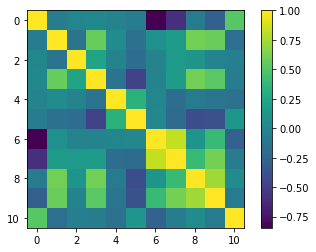

In [112]:
vals = data_set.corr()
plt.imshow(vals.values)
plt.colorbar()
plt.show()

In [113]:
vals

,YEAR,Suicides,Unnamed: 0,Area,Production,Annual_Rain,Avg_Temperature,Price,Cost_per_Hectare,Cost_per_quintal,Export
YEAR,1.000000,-0.072314,0.004526,0.018936,-0.021838,-0.068967,-0.844673,-0.589953,-0.091459,-0.276030,0.518227
Suicides,-0.072314,1.000000,-0.132979,0.569297,0.053705,-0.153630,0.078271,0.157430,0.605811,0.580935,-0.170629
Unnamed: 0,0.004526,-0.132979,1.000000,0.235798,-0.019426,-0.177365,-0.020204,0.151927,0.108755,-0.015712,-0.047121
Area,0.018936,0.569297,0.235798,1.000000,-0.141455,-0.474405,-0.018899,0.168734,0.604978,0.526788,-0.065960
Production,-0.021838,0.053705,-0.019426,-0.141455,1.000000,0.338707,0.000170,-0.178189,-0.091054,-0.119273,-0.154962
Annual_Rain,-0.068967,-0.153630,-0.177365,-0.474405,0.338707,1.000000,0.011724,-0.198641,-0.401591,-0.377049,0.122608
Avg_Temperature,-0.844673,0.078271,-0.020204,-0.018899,0.000170,0.011724,1.000000,0.833710,0.111818,0.398721,-0.267971
Price,-0.589953,0.157430,0.151927,0.168734,-0.178189,-0.198641,0.833710,1.000000,0.396087,0.614745,-0.068146
Cost_per_Hectare,-0.091459,0.605811,0.108755,0.604978,-0.091054,-0.401591,0.111818,0.396087,1.000000,0.740030,0.042826
Cost_per_quintal,-0.276030,0.580935,-0.015712,0.526788,-0.119273,-0.377049,0.398721,0.614745,0.740030,1.000000,-0.085704


In [164]:
from sklearn.cluster import KMeans as km
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso as LS
from sklearn.linear_model import Ridge as RG

In [276]:
model = LR()

X = data_set.drop(columns = ['Suicides', 'Unnamed: 0'],axis=1)

y = data_set['Suicides']


tou = 10

Xx = X.values[y>tou]
Yy = y.values[y>tou]

v1 = Xx.mean(axis = 0)
v2 = Xx.std(axis = 0)

Xx = Xx - v1
Xx = Xx / v2

model.fit(Xx,Yy)

yd = model.predict(Xx)

model.score(Xx,Yy)

0.5784777543713816

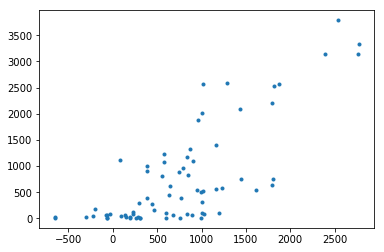

In [277]:
plt.plot(yd,Yy,'.')

In [278]:
model.coef_

array([ 465.24148068,  288.91589088,  -80.41830785,  326.39801617,
        568.22693271, -478.95561835,  446.20666128,  359.92494405,
       -287.14647594])

In [279]:
from sklearn.tree import DecisionTreeRegressor as scart

In [280]:
model = scart(max_depth = 10)

In [281]:
model.fit(Xx,Yy)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [282]:
model.score(Xx,Yy)

0.9988094337564417

In [283]:
Yd = model.predict(Xx)

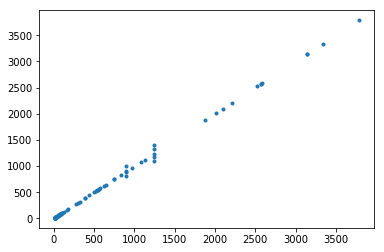

In [284]:
plt.plot(Yd,Yy,'.')

In [285]:
print(model.decision_path(Xx[0:1,:]))

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 11)	1


In [286]:
model.feature_importances_

array([4.45015777e-04, 5.04053910e-01, 4.85765455e-02, 1.36576048e-01,
       0.00000000e+00, 7.03570987e-04, 1.71175387e-01, 1.02158105e-01,
       3.63114192e-02])

In [291]:
model.feature_importances_.argmax()

1

In [292]:
X.columns

Index(['YEAR', 'Area', 'Production', 'Annual_Rain', 'Avg_Temperature', 'Price',
       'Cost_per_Hectare', 'Cost_per_quintal', 'Export'],
      dtype='object')

In [490]:
data_set = data.fillna(0).groupby(['Crop','YEAR']).agg('mean').reset_index()

In [491]:
data_set.columns

Index(['Crop', 'YEAR', 'Unnamed: 0', 'Area', 'Production', 'Annual_Rain',
       'Avg_Temperature', 'Price', 'Cost_per_Hectare', 'Cost_per_quintal',
       'Suicides', 'Export'],
      dtype='object')

In [492]:
dicts = {}
for crop in data_set['Crop'].unique():
    
    X = data_set[data_set['Crop'] == crop]['YEAR'].values.reshape(-1,1)
    Y = data_set[data_set['Crop'] == crop]['Production'].values
    if(X.shape[0] > 5):
#         print(X.shape,Y.shape)
        
        linmodel = LR()
        linmodel.fit(X,Y)
        w = linmodel.coef_[0]
        dicts[crop] = [w]
#         print(w)

In [493]:
slope_data = pd.DataFrame(dicts).T.reset_index().rename(columns = {0:'W slope'})

In [494]:
slope_data.shape

(59, 2)

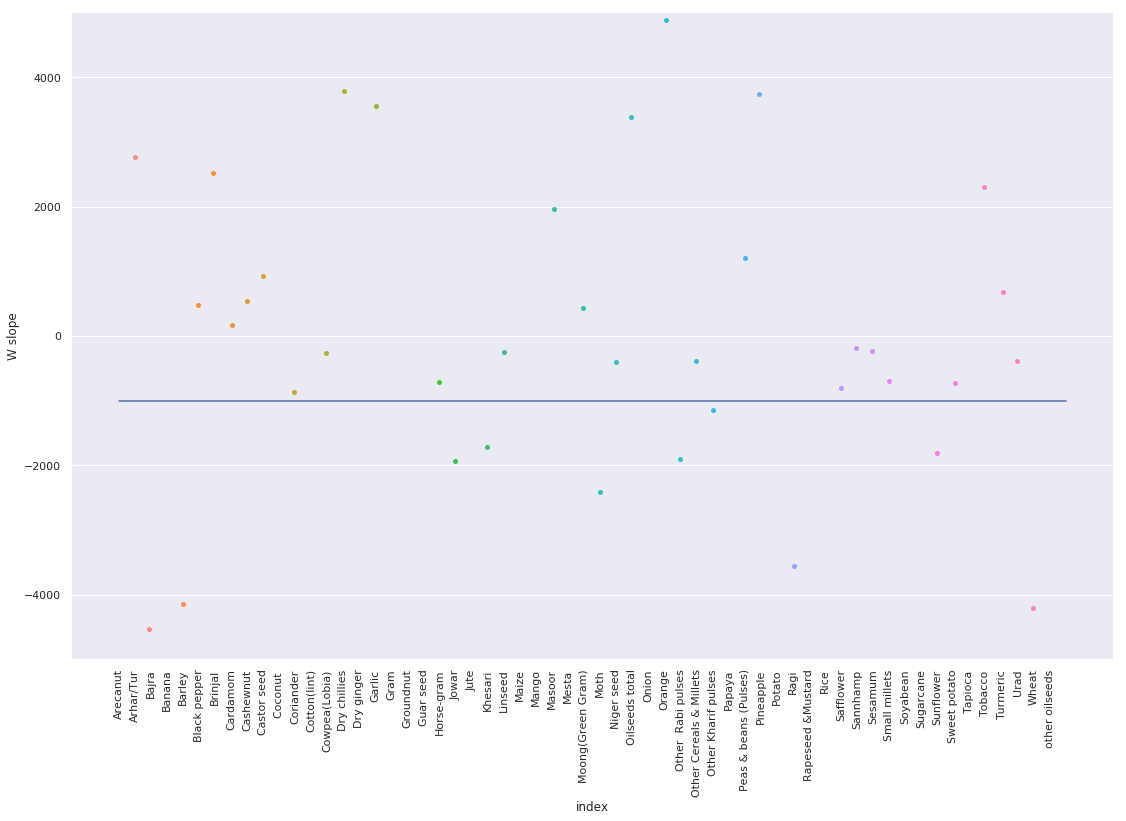

In [497]:
sns.catplot(x='index', y='W slope', data = slope_data,  height=10, aspect=13/8.27);
plt.ylim(-5000,5000)
plt.xticks(rotation='vertical')
plt.plot([0,59],[-1000,-1000])
plt.show()

In [502]:
data_set = data.fillna(0).groupby(['Crop','YEAR']).agg('mean').reset_index()

In [581]:
dicts = {}
dicts2 = {}
dicts3 = {}
maxw = 0
for crop in data_set['Crop'].unique():
    
    X = data_set[data_set['Crop'] == crop]['YEAR'].values.reshape(-1,1)
    Y = data_set[data_set['Crop'] == crop]['Production'].values
    Y2 = data_set[data_set['Crop'] == crop]['Price'].values
    
    X = X[Y2 > 0]
    Y = Y[Y2 > 0]
    Y2 = Y2[Y2 > 0]
    
    if(X.shape[0] > 5):
#         print(X.shape,Y.shape)
        
        linmodel = LR()
        linmodel.fit(X,Y)
        w = linmodel.coef_[0]
        linmodel.fit(X,Y2)
        w2 = linmodel.coef_[0]
        
        if(w > maxw):
            maxw = w
        
        if(w < 0 and w2 > 0):
            dicts[crop] = [w,w2]
        
        if(w < 10000 and w2 > 100): 
            dicts2[crop] = [w,w2]
            
        dicts3[crop] = [w,w2]
#         print(w)

In [582]:
slope_data = pd.DataFrame(dicts).T.reset_index().rename(columns = {0:'production var',1:'price var'})

In [583]:
slope_data

,index,production var,price var
0,Barley,-129.610556,51.277056
1,Jute,-43011.146430,125.248918
2,Niger seed,-144.009443,249.534632
3,Safflower,-1031.251935,122.445887
4,Sunflower,-4511.467222,223.906926


In [584]:
slope_data = pd.DataFrame(dicts2).T.reset_index().rename(columns = {0:'production var',1:'price var'})

In [585]:
slope_data

,index,production var,price var
0,Arhar/Tur,5237.572915,260.551948
1,Groundnut,1758.235163,199.339827
2,Jowar,3648.323679,234.956710
3,Jute,-43011.146430,125.248918
4,Niger seed,-144.009443,249.534632
5,Safflower,-1031.251935,122.445887
6,Sesamum,1494.291172,279.404762
7,Sunflower,-4511.467222,223.906926
8,Urad,2670.533797,284.469697


In [586]:
maxw

642131.8001273725

In [587]:
slope_data = pd.DataFrame(dicts3).T.reset_index().rename(columns = {0:'production var',1:'price var'})

In [588]:
slope_data

,index,production var,price var
0,Arhar/Tur,5237.572915,260.551948
1,Bajra,13476.838875,69.145022
2,Barley,-129.610556,51.277056
3,Cotton(lint),98938.700867,379.372294
4,Gram,17651.118445,169.123377
5,Groundnut,1758.235163,199.339827
6,Jowar,3648.323679,234.956710
7,Jute,-43011.146430,125.248918
8,Maize,49300.778390,68.593074
9,Niger seed,-144.009443,249.534632


In [595]:
data_set = data.fillna(0).groupby(['Crop','YEAR']).agg('mean').reset_index()

In [617]:
dicts = {}
dicts2 = {}
dicts3 = {}
maxw = 0
for crop in data_set['Crop'].unique():
    
    X = data_set[data_set['Crop'] == crop]['YEAR'].values.reshape(-1,1)
    Y = data_set[data_set['Crop'] == crop]['Cost_per_Hectare'].values
    Y2 = data_set[data_set['Crop'] == crop]['Price'].values
    
    X = X[Y2 > 0]
    Y = Y[Y2 > 0]
    Y2 = Y2[Y2 > 0]
    
    if(X.shape[0] > 5):
#         print(X.shape,Y.shape)
        
        linmodel = LR()
        linmodel.fit(X,Y)
        w = linmodel.coef_[0]
        linmodel.fit(X,Y2)
        w2 = linmodel.coef_[0]
        
        if(w> 0):
            dicts3[crop] = [w,w2]
#         print(w)

In [618]:
slope_data = pd.DataFrame(dicts3).T.reset_index().rename(columns = {0:'cost_per_hec var',1:'price var'})

In [626]:
slope_data['grow_ratio'] = (slope_data['cost_per_hec var']**-1)*slope_data['price var']

In [639]:
slope_data.sort_values(by = 'grow_ratio', ascending = False)

,index,cost_per_hec var,price var,grow_ratio
0,Arhar/Tur,1155.433382,260.551948,0.225501
2,Gram,865.233108,169.123377,0.195466
1,Cotton(lint),2477.784265,379.372294,0.153109
3,Groundnut,1623.278151,199.339827,0.122801
5,Rice,1311.470880,150.562771,0.114805
4,Maize,868.141613,68.593074,0.079011
7,Wheat,1122.494264,81.904762,0.072967
6,Sugarcane,3281.720563,10.367338,0.003159


In [640]:
"Done"

'Done'